In [1]:
# pip install tensorflow keras

In [2]:
import numpy as np
import pandas as pd

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [3]:
from tvDatafeed import TvDatafeed,Interval

In [4]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [5]:
niftydf = tv.get_hist(symbol='NIFTY_50', exchange='NSE', interval=Interval.in_daily,n_bars=5000)

In [6]:
# niftydf.to_csv('data.csv')

In [7]:
niftydf

,symbol,open,high,low,close,volume
datetime,,,,,,
2002-08-14 09:15:00,NSE:NIFTY_50,976.04999,976.25000,967.25000,969.65002,40794001.0
2002-08-16 09:15:00,NSE:NIFTY_50,970.75000,981.20001,968.34998,979.25000,33890001.0
2002-08-19 09:15:00,NSE:NIFTY_50,979.40002,983.54999,978.20001,979.84998,29703999.0
2002-08-20 09:15:00,NSE:NIFTY_50,979.75000,990.84998,979.04999,988.54999,41503998.0
2002-08-21 09:15:00,NSE:NIFTY_50,988.59998,994.25000,984.34998,988.45001,55111000.0
...,...,...,...,...,...,...
2022-10-19 09:15:00,NSE:NIFTY_50,17568.15000,17607.60000,17472.85000,17512.25000,210480869.0
2022-10-20 09:15:00,NSE:NIFTY_50,17423.10000,17584.15000,17421.00000,17563.94900,249604832.0
2022-10-21 09:15:00,NSE:NIFTY_50,17622.85000,17670.15000,17520.75000,17576.30100,277702680.0


In [8]:
stock_prices = niftydf.close.values.astype('float32')
stock_prices = stock_prices.reshape(5000, 1)
stock_prices.shape

(5000, 1)

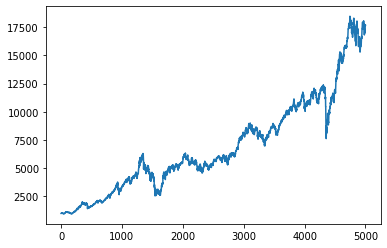

In [9]:
plt.plot(stock_prices)
plt.show()


In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices = scaler.fit_transform(stock_prices)

In [11]:
train_size = int(len(stock_prices) * 0.80)
test_size = len(stock_prices) - train_size
train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]
print(len(train), len(test))

4000 1000


In [12]:
stock_prices

array([[0.00267455],
       [0.00322143],
       [0.0032556 ],
       ...,
       [0.9486879 ],
       [0.9574863 ],
       [0.9542819 ]], dtype=float32)

In [13]:
# stock_prices[0: 1, 0], stock_prices[1, 0], stock_prices[:, 0]

In [14]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
testX, testY

(array([[[0.54401326]],
 
        [[0.5462919 ]],
 
        [[0.55040765]],
 
        [[0.5429053 ]],
 
        [[0.53438884]],
 
        [[0.5310706 ]],
 
        [[0.5254594 ]],
 
        [[0.52990276]],
 
        [[0.5242119 ]],
 
        [[0.5188058 ]],
 
        [[0.5313896 ]],
 
        [[0.52839893]],
 
        [[0.53911984]],
 
        [[0.53876954]],
 
        [[0.548599  ]],
 
        [[0.546947  ]],
 
        [[0.5472888 ]],
 
        [[0.55118525]],
 
        [[0.55043334]],
 
        [[0.5445658 ]],
 
        [[0.5502795 ]],
 
        [[0.5499263 ]],
 
        [[0.55222774]],
 
        [[0.555959  ]],
 
        [[0.56058466]],
 
        [[0.5544779 ]],
 
        [[0.55127925]],
 
        [[0.54710364]],
 
        [[0.5529056 ]],
 
        [[0.55615264]],
 
        [[0.55861646]],
 
        [[0.5660135 ]],
 
        [[0.5670417 ]],
 
        [[0.5674405 ]],
 
        [[0.5666287 ]],
 
        [[0.5616955 ]],
 
        [[0.55134195]],
 
        [[0.5566141 ]],
 
        [[0.

In [18]:
model = Sequential()

# model.add(LSTM(
#     50,
#     return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(
#     100,
#     return_sequences=False))
# model.add(Dropout(0.2))

# model.add(Dense(
#     output_dim=1))
# model.add(Activation('linear'))
model.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

start = time.time()
# model.compile(loss='mse', optimizer='rmsprop')
model.compile(optimizer='adam', 
              loss='mean_squared_error')
print ('compilation time : ', time.time() - start)

compilation time :  0.10316014289855957


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [20]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model.hdf5', verbose = 2, save_best_only = True)

In [21]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=25,
    callbacks=[checkpointer],
    validation_split=0.05)

Epoch 1/25
26/30 [=========================>....] - ETA: 0s - loss: 0.0507
Epoch 1: val_loss improved from inf to 0.12629, saving model to model.hdf5
30/30 [==============================] - 17s 145ms/step - loss: 0.0475 - val_loss: 0.1263
Epoch 2/25
28/30 [===========================>..] - ETA: 0s - loss: 0.0155
Epoch 2: val_loss improved from 0.12629 to 0.06049, saving model to model.hdf5
30/30 [==============================] - 1s 18ms/step - loss: 0.0154 - val_loss: 0.0605
Epoch 3/25
27/30 [==========================>...] - ETA: 0s - loss: 0.0099
Epoch 3: val_loss improved from 0.06049 to 0.01326, saving model to model.hdf5
30/30 [==============================] - 1s 21ms/step - loss: 0.0095 - val_loss: 0.0133
Epoch 4/25
27/30 [==========================>...] - ETA: 0s - loss: 0.0024
Epoch 4: val_loss improved from 0.01326 to 0.00156, saving model to model.hdf5
30/30 [==============================] - 1s 17ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 5/25
26/30 [================

In [22]:
# model.save('model.hdf5')

In [23]:
# from keras.models import load_model

# model = load_model('model.hdf5')

In [24]:
# def plot_results_multiple(predicted_data, true_data,length):
#     plt.plot(scaler.inverse_transform(true_data[:length].reshape(-1, 1)))
#     plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1)))
#     plt.show()

# def predict_sequences_multiple(model, firstValue,length):
#     prediction_seqs = []
#     curr_frame = firstValue
    
#     for i in range(length): 
#         predicted = []        
        
#         print(model.predict(curr_frame[newaxis,:,:]))
#         print(curr_frame[newaxis,:,:])
#         predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
#         curr_frame = curr_frame[0:]
#         curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
#         prediction_seqs.append(predicted[-1])
        
#     return prediction_seqs

In [25]:
testX

array([[[0.54401326]],

       [[0.5462919 ]],

       [[0.55040765]],

       [[0.5429053 ]],

       [[0.53438884]],

       [[0.5310706 ]],

       [[0.5254594 ]],

       [[0.52990276]],

       [[0.5242119 ]],

       [[0.5188058 ]],

       [[0.5313896 ]],

       [[0.52839893]],

       [[0.53911984]],

       [[0.53876954]],

       [[0.548599  ]],

       [[0.546947  ]],

       [[0.5472888 ]],

       [[0.55118525]],

       [[0.55043334]],

       [[0.5445658 ]],

       [[0.5502795 ]],

       [[0.5499263 ]],

       [[0.55222774]],

       [[0.555959  ]],

       [[0.56058466]],

       [[0.5544779 ]],

       [[0.55127925]],

       [[0.54710364]],

       [[0.5529056 ]],

       [[0.55615264]],

       [[0.55861646]],

       [[0.5660135 ]],

       [[0.5670417 ]],

       [[0.5674405 ]],

       [[0.5666287 ]],

       [[0.5616955 ]],

       [[0.55134195]],

       [[0.5566141 ]],

       [[0.5449219 ]],

       [[0.5483797 ]],

       [[0.5591149 ]],

       [[0.56218

In [31]:
def predict(l = 1):
    op = []
    for i in range(100):
        op.append(model.predict(np.array([testX[i]]))[0][0])
    return op

In [32]:
temp = predict(1)

1/1 [==============================] - 0s 50ms/step


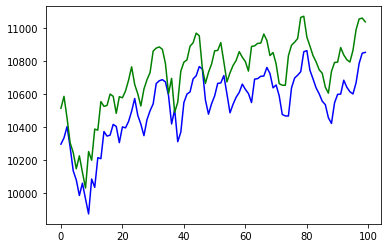

In [34]:
plt.plot(scaler.inverse_transform(np.array(temp).reshape(-1, 1)), color="blue")
plt.plot(scaler.inverse_transform(testY[:100].reshape(-1, 1)), color="green")
plt.show()

In [29]:
# predict_length=10
# predictions = predict_sequences_multiple(model, testX[0], predict_length)
# print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
# plot_results_multiple(predictions, testY[:10], predict_length)
# plt.clf()